/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training model with SGD optimizer:
Epoch 1/50 - SGD - Train Loss: 1.0277, Val Loss: 0.8913
Epoch 2/50 - SGD - Train Loss: 0.9656, Val Loss: 0.9122
Epoch 3/50 - SGD - Train Loss: 0.9504, Val Loss: 0.8983
Epoch 4/50 - SGD - Train Loss: 0.9397, Val Loss: 0.9020
Epoch 5/50 - SGD - Train Loss: 0.9288, Val Loss: 0.9162
Epoch 6/50 - SGD - Train Loss: 0.9214, Val Loss: 0.9044
Epoch 7/50 - SGD - Train Loss: 0.9140, Val Loss: 0.9066
Epoch 8/50 - SGD - Train Loss: 0.9052, Val Loss: 0.9137
Epoch 9/50 - SGD - Train Loss: 0.8998, Val Loss: 0.9225
Epoch 10/50 - SGD - Train Loss: 0.8925, Val Loss: 0.9251
Epoch 11/50 - SGD - Train Loss: 0.8881, Val Loss: 0.9328
Epoch 12/50 - SGD - Train Loss: 0.8773, Val Loss: 0.9410
Epoch 13/50 - SGD - Train Loss: 0.8684, Val Loss: 0.9650
Epoch 14/50 - SGD - Train Loss: 0.8627, Val Loss: 0.9467
Epoch 15/50 - SGD - Train Loss: 0.8530, Val Loss: 0.9766
Epoch 16/50 - SGD - Train Loss: 0.8471, Val Loss: 0.9702
Epoch 17/50 - SGD - Train Loss: 0.8326, Val Loss: 0.9863
Epoc

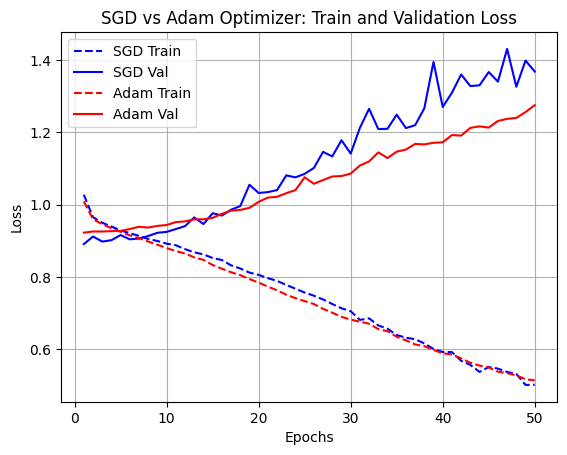

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# Data generation with additional randomness for demonstration
def generate_synthetic_data():
    X = np.random.normal(0, 1, (1200, 10))
    y = np.random.normal(0, 1, (1200, 1))
    return X, y

# Model creation with an additional hidden layer and adjusted units
def initialize_model():
    model = models.Sequential([
        layers.Dense(60, activation='relu', input_shape=(10,)),
        layers.Dense(30, activation='relu'),
        layers.Dense(15, activation='relu'),
        layers.Dense(1)
    ])
    return model

# Training function modified to include validation data
def train_model_collecting_loss(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    history = []
    for epoch in range(epochs):
        # Split data into train/validation sets (80/20 split)
        X_train, X_val = X[:1000], X[1000:]
        y_train, y_val = y[:1000], y[1000:]

        hist = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                         batch_size=batch_size, epochs=1, verbose=0)
        train_loss = hist.history['loss'][0]
        val_loss = hist.history['val_loss'][0]
        history.append((train_loss, val_loss))

        print(f'Epoch {epoch + 1}/{epochs} - {optimizer_name} - Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')
    return history

# Generate data
X, y = generate_synthetic_data()

# Initialize models for different optimizers
model_sgd = initialize_model()
model_adam = initialize_model()

# Optimizers with adjusted learning rates
optimizer_sgd = optimizers.SGD(learning_rate=0.02)
optimizer_adam = optimizers.Adam(learning_rate=0.0005)

# Parameters for training
epochs = 50
batch_size = 32

print('\nTraining model with SGD optimizer:')
sgd_loss = train_model_collecting_loss(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print('\nTraining model with Adam optimizer:')
adam_loss = train_model_collecting_loss(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

# Plotting both train and validation losses
train_losses_sgd, val_losses_sgd = zip(*sgd_loss)
train_losses_adam, val_losses_adam = zip(*adam_loss)

plt.plot(range(1, epochs + 1), train_losses_sgd, label='SGD Train', color='blue', linestyle='--')
plt.plot(range(1, epochs + 1), val_losses_sgd, label='SGD Val', color='blue')
plt.plot(range(1, epochs + 1), train_losses_adam, label='Adam Train', color='red', linestyle='--')
plt.plot(range(1, epochs + 1), val_losses_adam, label='Adam Val', color='red')

plt.title('SGD vs Adam Optimizer: Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
